# 1. Imports

## 1.1 Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import sqlite3 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil 
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.base import clone
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

from pandas_profiling import ProfileReport

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## 1.2 Import dataset

In [2]:
df = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

__Copy of the original dataset:__

In [3]:
df_original = df.copy()

-------------------------------

# 2. Data Exploration

In [4]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [5]:
df.shape

(14942, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender']) # 0 Female | 1 Male

In [9]:
date_columns = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], format='%Y-%m-%d')

In [10]:
df.dtypes

ID                                     int64
Age                                    int64
Gender                                 int32
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                              int64
AthleticsActivities                  float64
WaterActivities                      float64
FitnessActivities                    float64
DanceActivities                      float64
TeamActivities                       float64
RacketActivities                     float64
CombatActivities                     float64
NatureActivities                     float64
SpecialActivities                    float64
OtherActivities                      float64
NumberOfFr

In [11]:
# Check descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,14942.0,17470.5,10000.0,13735.25,17470.5,21205.75,24941.0,4313.528196
Age,14942.0,26.015794,0.0,19.0,23.0,31.0,87.0,14.156582
Gender,14942.0,0.402289,0.0,0.0,0.0,1.0,1.0,0.490376
Income,14447.0,2230.816086,0.0,1470.0,1990.0,2790.0,10890.0,1566.527734
EnrollmentStart,14942,2016-11-10 07:44:13.620666624,2014-06-02 00:00:00,2015-08-01 00:00:00,2016-09-23 00:00:00,2018-03-06 00:00:00,2019-10-21 00:00:00,NaN
EnrollmentFinish,14942,2017-09-02 00:38:27.161022720,2014-06-02 00:00:00,2016-06-04 00:00:00,2017-08-29 00:00:00,2018-12-11 00:00:00,2019-10-31 00:00:00,NaN
LastPeriodStart,14942,2017-06-30 17:48:05.878731008,2014-01-01 00:00:00,2016-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2019-07-01 00:00:00,NaN
LastPeriodFinish,14942,2018-03-06 15:23:26.558693632,2014-12-31 00:00:00,2016-12-31 00:00:00,2018-06-30 00:00:00,2019-06-30 00:00:00,2019-12-31 00:00:00,NaN
DateLastVisit,14942,2017-10-23 22:24:18.118056448,2014-07-03 00:00:00,2016-05-25 00:00:00,2018-01-18 00:00:00,2019-05-30 00:00:00,2019-10-31 00:00:00,NaN
DaysWithoutFrequency,14942.0,81.224936,0.0,13.0,41.0,83.75,1745.0,144.199576


In [12]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [13]:
df.duplicated().sum()

0

# 3. Data Preprocessing

In [14]:
df.set_index('ID', inplace = True)

In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
# Duplicated observations
df.duplicated().sum()

0

In [18]:
# Remove columns 'DanceActivities' and 'NatureActivities' because both have only 1 value
df = df.drop(columns=['DanceActivities','NatureActivities'])

#### Enrollment

In [19]:
# Não há nenhuma incoerência em que EnrollmentStart seja depois de EnrollmentFinish
df[df['EnrollmentStart'] > df['EnrollmentFinish']]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,


In [20]:
# Não há nenhuma incoerência em que DateLastVisit seja depois de EnrollmentFinish, quando dropout=1
df[(df['Dropout'] == 1) & (df['DateLastVisit'] > df['EnrollmentFinish'])]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,


In [21]:
# Não há nenhuma observação em que EnrollmentStart e EnrollmentFinish sejam iguais e Dropout=1.
# Isso só acontece quando o cliente ainda está inscrito (Dropout=0)
df[(df['EnrollmentStart'] == df['EnrollmentFinish']) & df['Dropout'] == 1]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,


In [22]:
# Se dropout=0 (o cliente ainda está inscrito), então EnrollmentFinish deve ser a data de até quando foram recolhidos os dados: 2019-10-31.
df.loc[df['Dropout'] == 0, 'EnrollmentFinish'] = pd.to_datetime('2019-10-31')

In [23]:
# Calculate the difference in days between EnrollmentStart and EnrollmentFinish.
df['DaysEnrolled'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

#### Activities

In [24]:
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Fill missing values with the mode
for column in activity_columns:
    mode_value = df[column].mode().iloc[0]  # Calculate the mode
    df[column] = df[column].fillna(mode_value)

df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout                         0
DaysEnrolled                    0
dtype: int64

In [25]:
# Create a new column 'TotalActivities' by summing the binary columns
df['NumberOfActivities'] = df[activity_columns].sum(axis=1)
df['NumberOfActivities'].value_counts()

NumberOfActivities
1.0    13611
2.0     1199
3.0      100
0.0       20
4.0        9
5.0        2
Name: count, dtype: int64

In [26]:
pd.DataFrame(df[activity_columns].sum(axis=0), columns=['ActivityCount']).sort_values('ActivityCount', ascending=False)

,ActivityCount
FitnessActivities,8622.0
WaterActivities,4414.0
CombatActivities,1609.0
TeamActivities,828.0
SpecialActivities,395.0
RacketActivities,349.0
AthleticsActivities,110.0
OtherActivities,28.0


#### HasReferences

In [27]:
# Nas observações em que 'HasReferences'==1 e 'NumberOfReferences'==0, mudamos a variável 'HasReferences' para 0
df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = 0

In [28]:
# Fill missing values in 'HasReferences' based on 'NumberOfReferences'
df['HasReferences'] = df['HasReferences'].fillna(df['NumberOfReferences'].gt(0).astype(int))

# If 'NumberOfReferences' is 0, the missing value in 'HasReferences' is filled with 0.
# If 'NumberOfReferences' is greater than 0, the missing value in 'HasReferences' is filled with 1.

df['HasReferences'].isna().sum()

0

In [29]:
df['NumberOfReferences'].value_counts()

NumberOfReferences
0    14645
1      267
2       21
3        8
Name: count, dtype: int64

In [30]:
df.drop('NumberOfReferences', axis=1, inplace=True)

In [31]:
df.drop(['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit'], axis=1, inplace=True)

In [32]:
df.drop(['UseByTime','AllowedNumberOfVisitsBySLA','AllowedWeeklyVisitsBySLA','RealNumberOfVisits'], axis=1, inplace=True)

In [33]:
df.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,HasReferences,Dropout,DaysEnrolled,NumberOfActivities
ID,,,,,,,,,,,,,,,,,,,,
10000,60,0,5500.0,1,89.35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7,0,0.0,0,58,1.0
10001,29,0,2630.0,60,479.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2,0.0,1,398,1.0
10002,23,1,1980.0,7,37.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0,0,0.0,1,30,1.0
10003,9,1,0.0,22,155.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2,0,0.0,1,160,1.0
10004,35,1,4320.0,210,373.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0,3,0.0,1,778,1.0


In [34]:
df.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'NumberOfRenewals', 'HasReferences', 'Dropout',
       'DaysEnrolled', 'NumberOfActivities'],
      dtype='object')

In [35]:
# Count of missing values
df.isna().sum().sort_values()

Age                       0
Dropout                   0
HasReferences             0
NumberOfRenewals          0
AttendedClasses           0
OtherActivities           0
SpecialActivities         0
CombatActivities          0
DaysEnrolled              0
RacketActivities          0
FitnessActivities         0
WaterActivities           0
AthleticsActivities       0
LifetimeValue             0
DaysWithoutFrequency      0
Gender                    0
TeamActivities            0
NumberOfActivities        0
NumberOfFrequencies      26
Income                  495
dtype: int64

In [36]:
# Fill missing values with the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df[['Income', 'NumberOfFrequencies']] = imputer.fit_transform(df[['Income', 'NumberOfFrequencies']])

In [37]:
# Recount of missing values
df.isna().sum()

Age                     0
Gender                  0
Income                  0
DaysWithoutFrequency    0
LifetimeValue           0
AthleticsActivities     0
WaterActivities         0
FitnessActivities       0
TeamActivities          0
RacketActivities        0
CombatActivities        0
SpecialActivities       0
OtherActivities         0
NumberOfFrequencies     0
AttendedClasses         0
NumberOfRenewals        0
HasReferences           0
Dropout                 0
DaysEnrolled            0
NumberOfActivities      0
dtype: int64

In [38]:
# New column 'Regularity'
df['Regularity'] = df['NumberOfFrequencies'] / df['DaysEnrolled']

In [39]:
# New column 'CostPerDay'
df['CostPerDayEnrolled'] = df['LifetimeValue'] / df['DaysEnrolled']

In [40]:
df.dtypes

Age                       int64
Gender                    int32
Income                  float64
DaysWithoutFrequency      int64
LifetimeValue           float64
AthleticsActivities     float64
WaterActivities         float64
FitnessActivities       float64
TeamActivities          float64
RacketActivities        float64
CombatActivities        float64
SpecialActivities       float64
OtherActivities         float64
NumberOfFrequencies     float64
AttendedClasses           int64
NumberOfRenewals          int64
HasReferences           float64
Dropout                   int64
DaysEnrolled              int64
NumberOfActivities      float64
Regularity              float64
CostPerDayEnrolled      float64
dtype: object

In [41]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'NumberOfRenewals',
                   'DaysEnrolled', 'NumberOfActivities', 'Regularity', 'CostPerDayEnrolled']
bin_features = ['Gender', 'HasReferences', 'Dropout', 
                'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 
                'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities',]

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.0

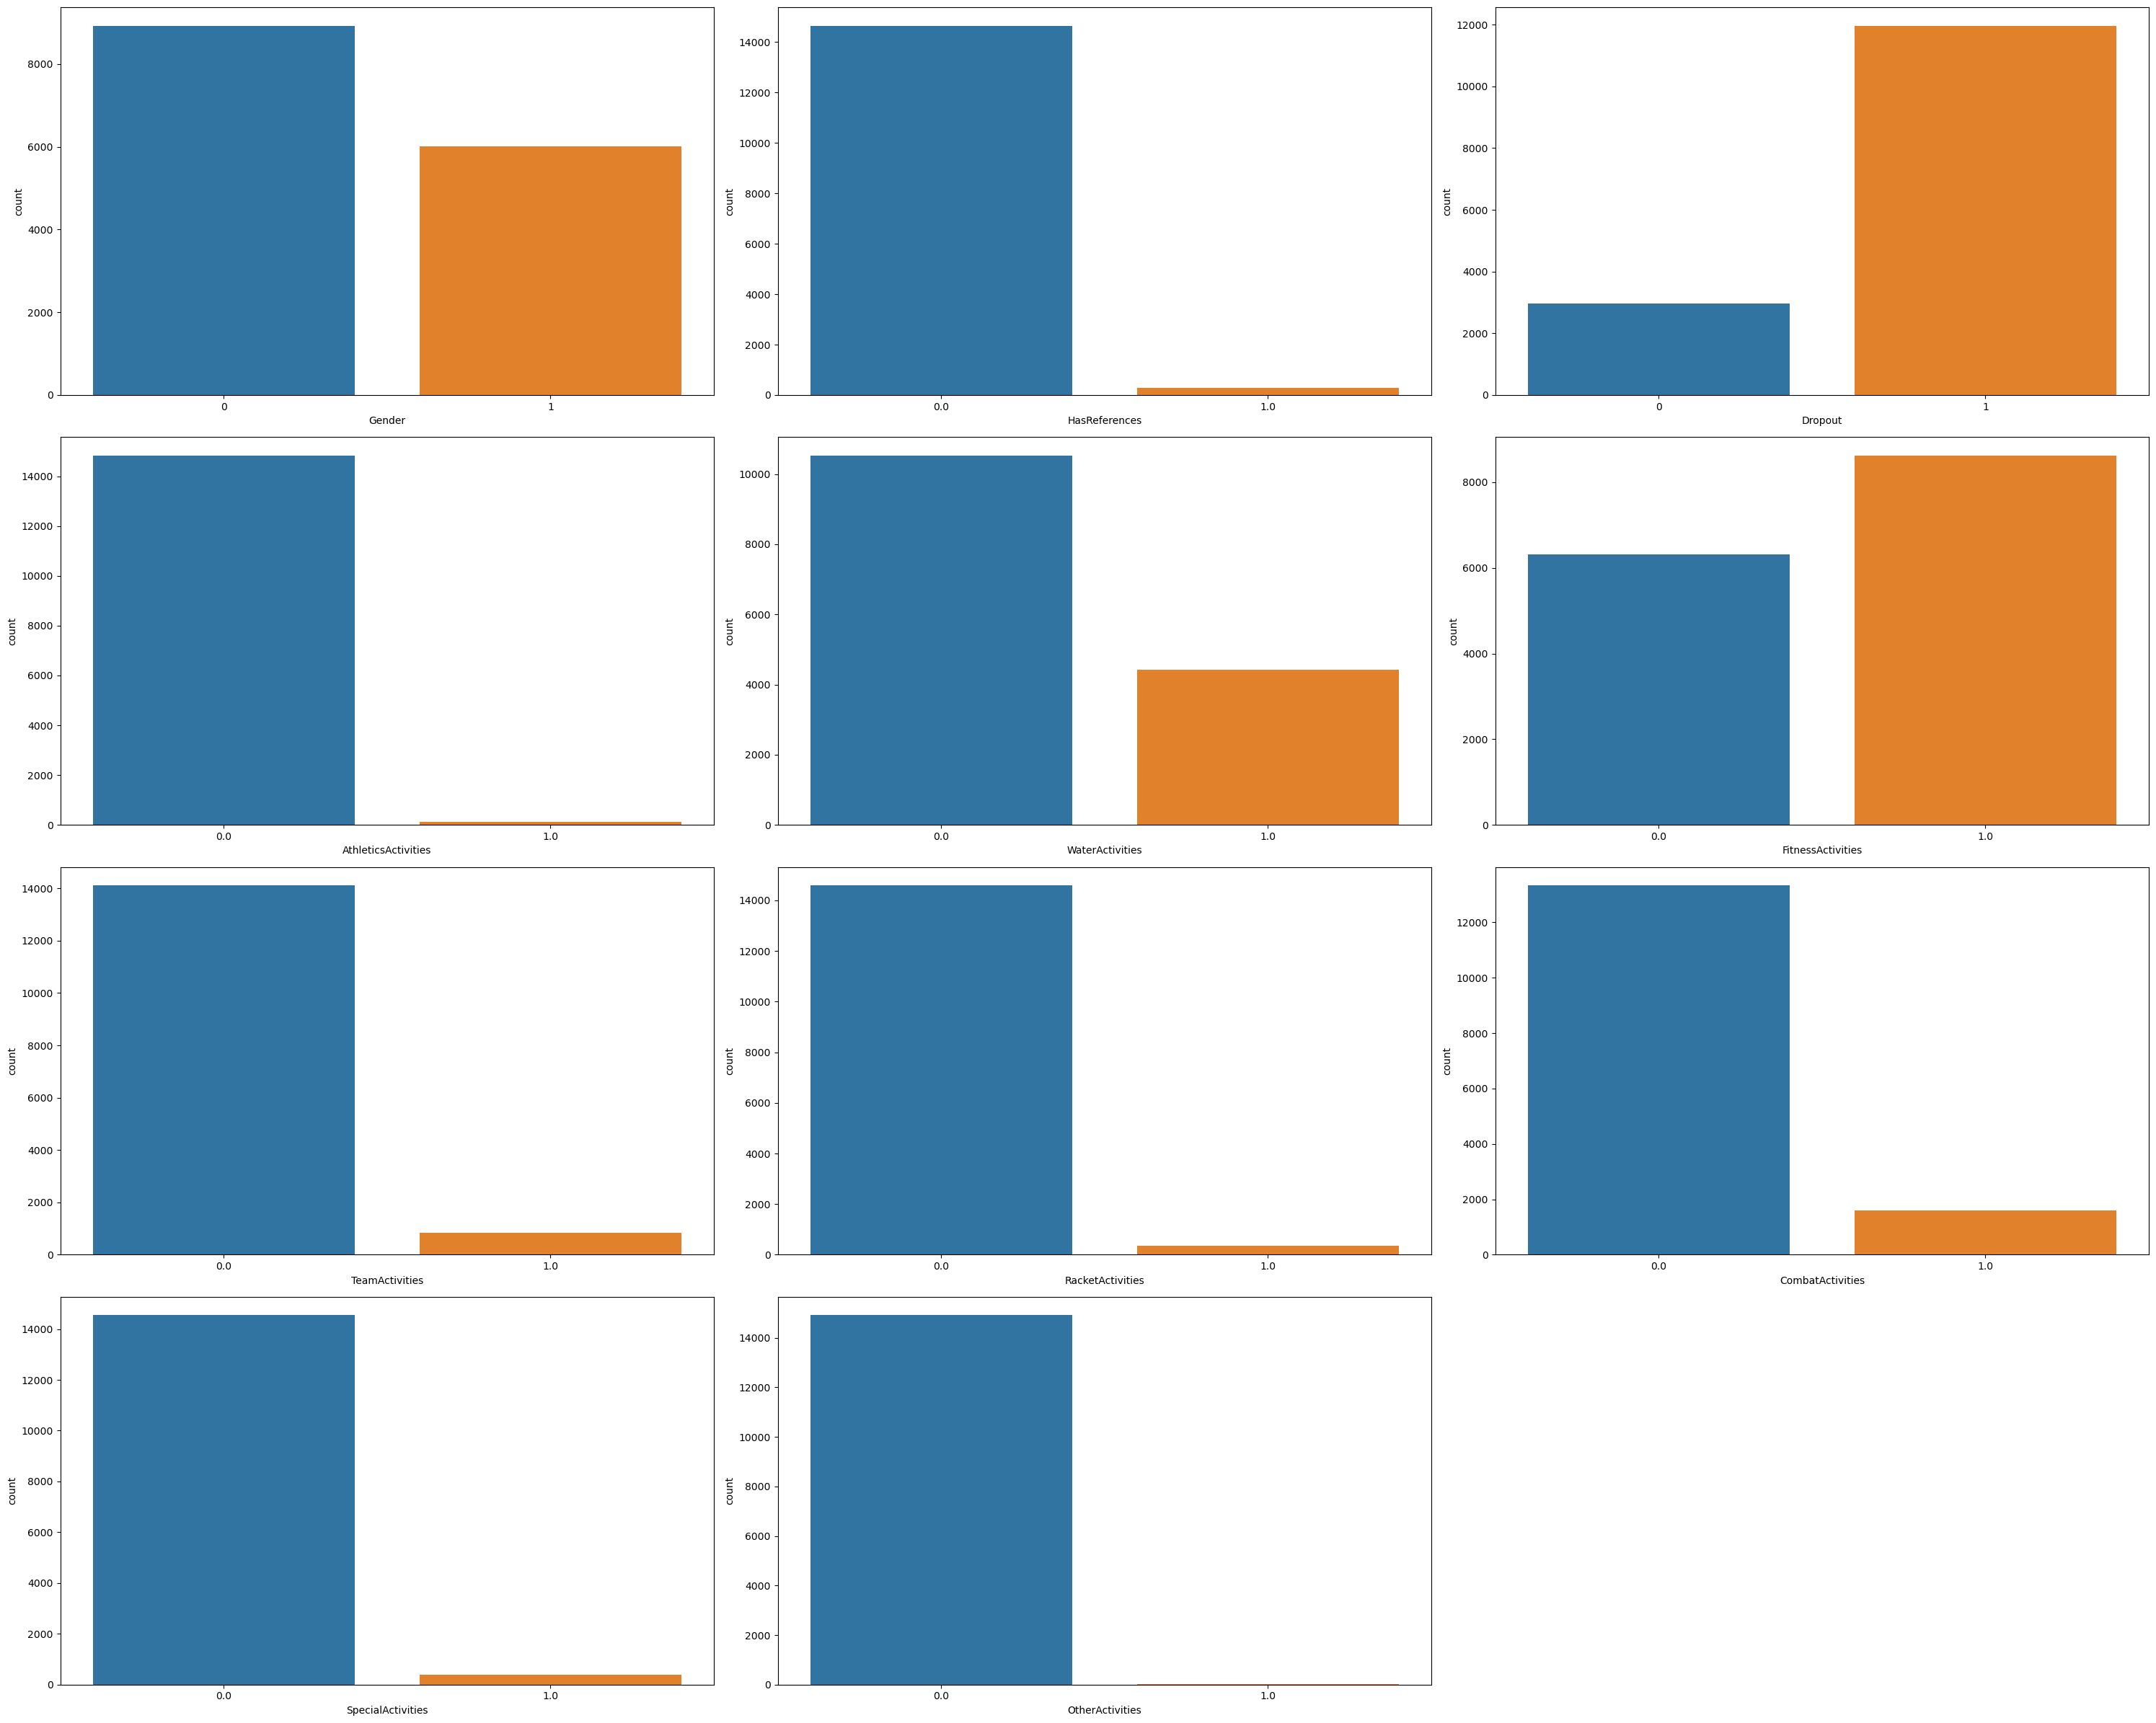

In [42]:
df_copy = df.copy()

n_features = len(bin_features)
n_rows = (n_features + 2) // 3

# Set the size of the entire figure
plt.figure(figsize=(30, 6 * n_rows)) 

# Loop through the features and create subplots
for i, feature in enumerate(bin_features):
    plt.subplot(n_rows, 3, i+1) 
    sns.countplot(x=feature, data=df_copy[bin_features])

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
for feature in bin_features:
    print(df_copy[feature].value_counts(normalize=True), '\n')

Gender
0    0.597684
1    0.402316
Name: proportion, dtype: float64 

HasReferences
0.0    0.980189
1.0    0.019811
Name: proportion, dtype: float64 

Dropout
1    0.80095
0    0.19905
Name: proportion, dtype: float64 

AthleticsActivities
0.0    0.992638
1.0    0.007362
Name: proportion, dtype: float64 

WaterActivities
0.0    0.704571
1.0    0.295429
Name: proportion, dtype: float64 

FitnessActivities
1.0    0.57707
0.0    0.42293
Name: proportion, dtype: float64 

TeamActivities
0.0    0.944582
1.0    0.055418
Name: proportion, dtype: float64 

RacketActivities
0.0    0.976641
1.0    0.023359
Name: proportion, dtype: float64 

CombatActivities
0.0    0.89231
1.0    0.10769
Name: proportion, dtype: float64 

SpecialActivities
0.0    0.973563
1.0    0.026437
Name: proportion, dtype: float64 

OtherActivities
0.0    0.998126
1.0    0.001874
Name: proportion, dtype: float64 



**Correlation Heatmap**  

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_copy[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=18)

plt.show()

In [ ]:
sns.pairplot(df_copy[metric_features])
plt.show()

## Treating Outliers

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol

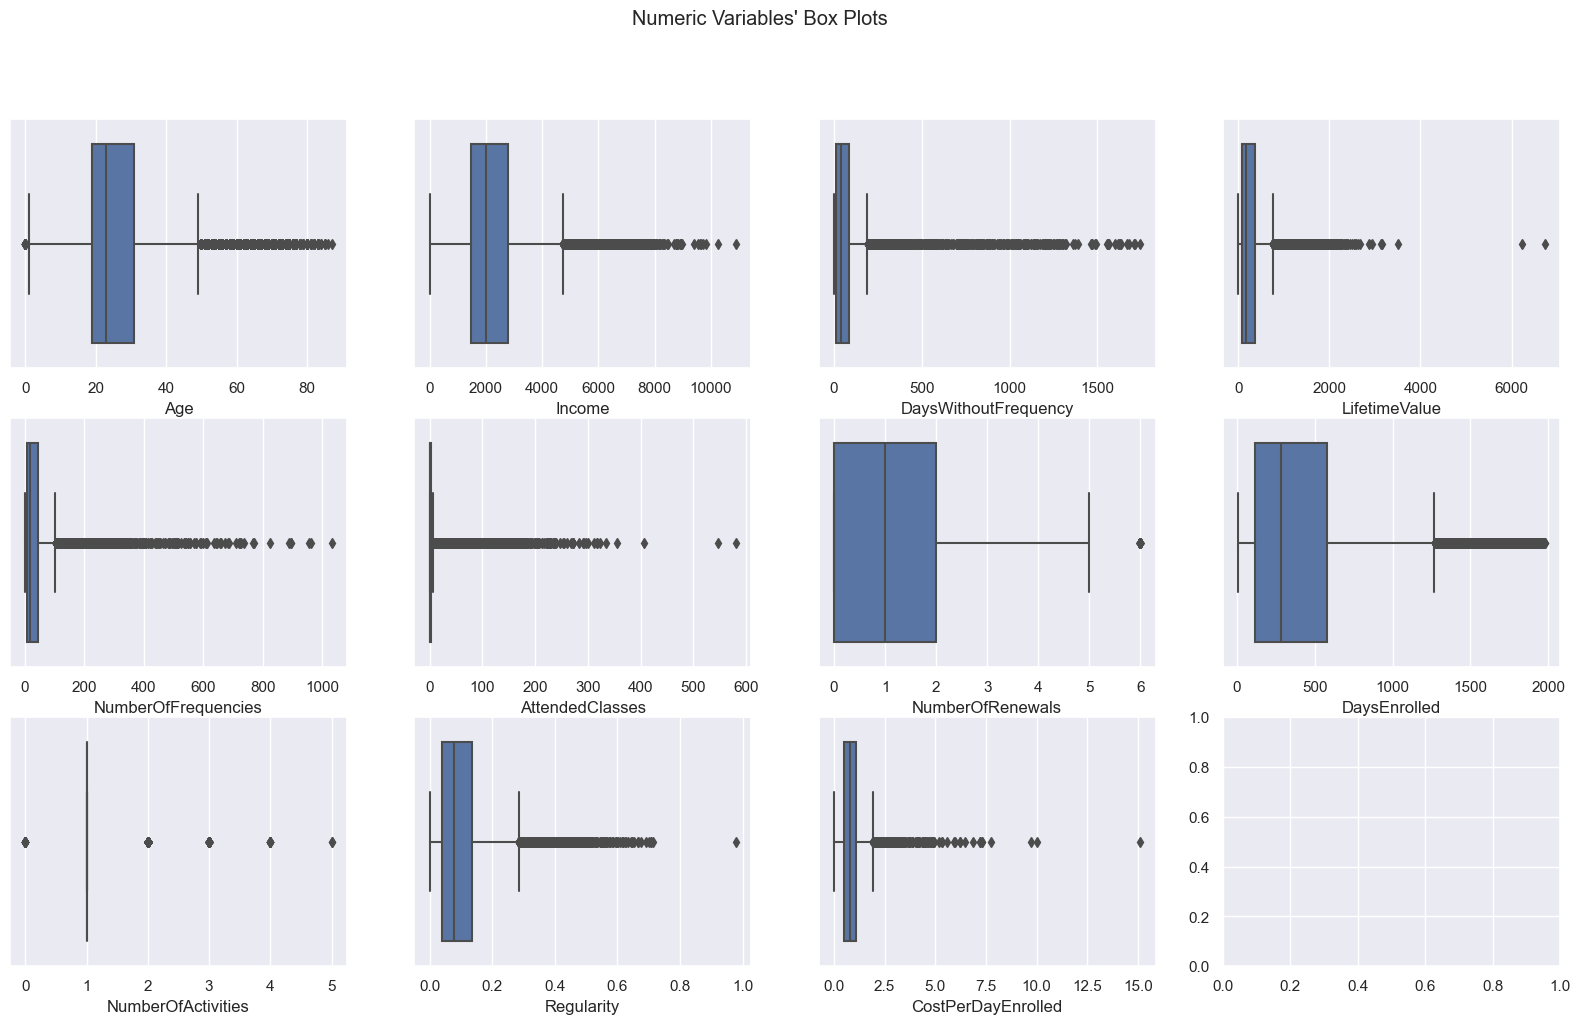

In [44]:
# Numeric Variables' Histograms
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_copy[feat], ax=ax)
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__"Manually" filtering the dataset's outliers__

In [45]:
filters1 = ((df_copy['Income']<=8000) &
            (df_copy['DaysWithoutFrequency']<=1000) &
            (df_copy['LifetimeValue']<=2300) &
            (df_copy['NumberOfFrequencies']<=450) &
            (df_copy['AttendedClasses']<=250) &
            (df_copy['Regularity']<0.8) &
            (df_copy['CostPerDayEnrolled']<5.0))

df_manual = df_copy[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_manual.shape[0] / df_original.shape[0], 4))
print('Percentage of data removed:', np.round(1 - np.round(df_manual.shape[0] / df_original.shape[0], 4), 4))

Percentage of data kept after removing outliers: 0.9837
Percentage of data removed: 0.0163


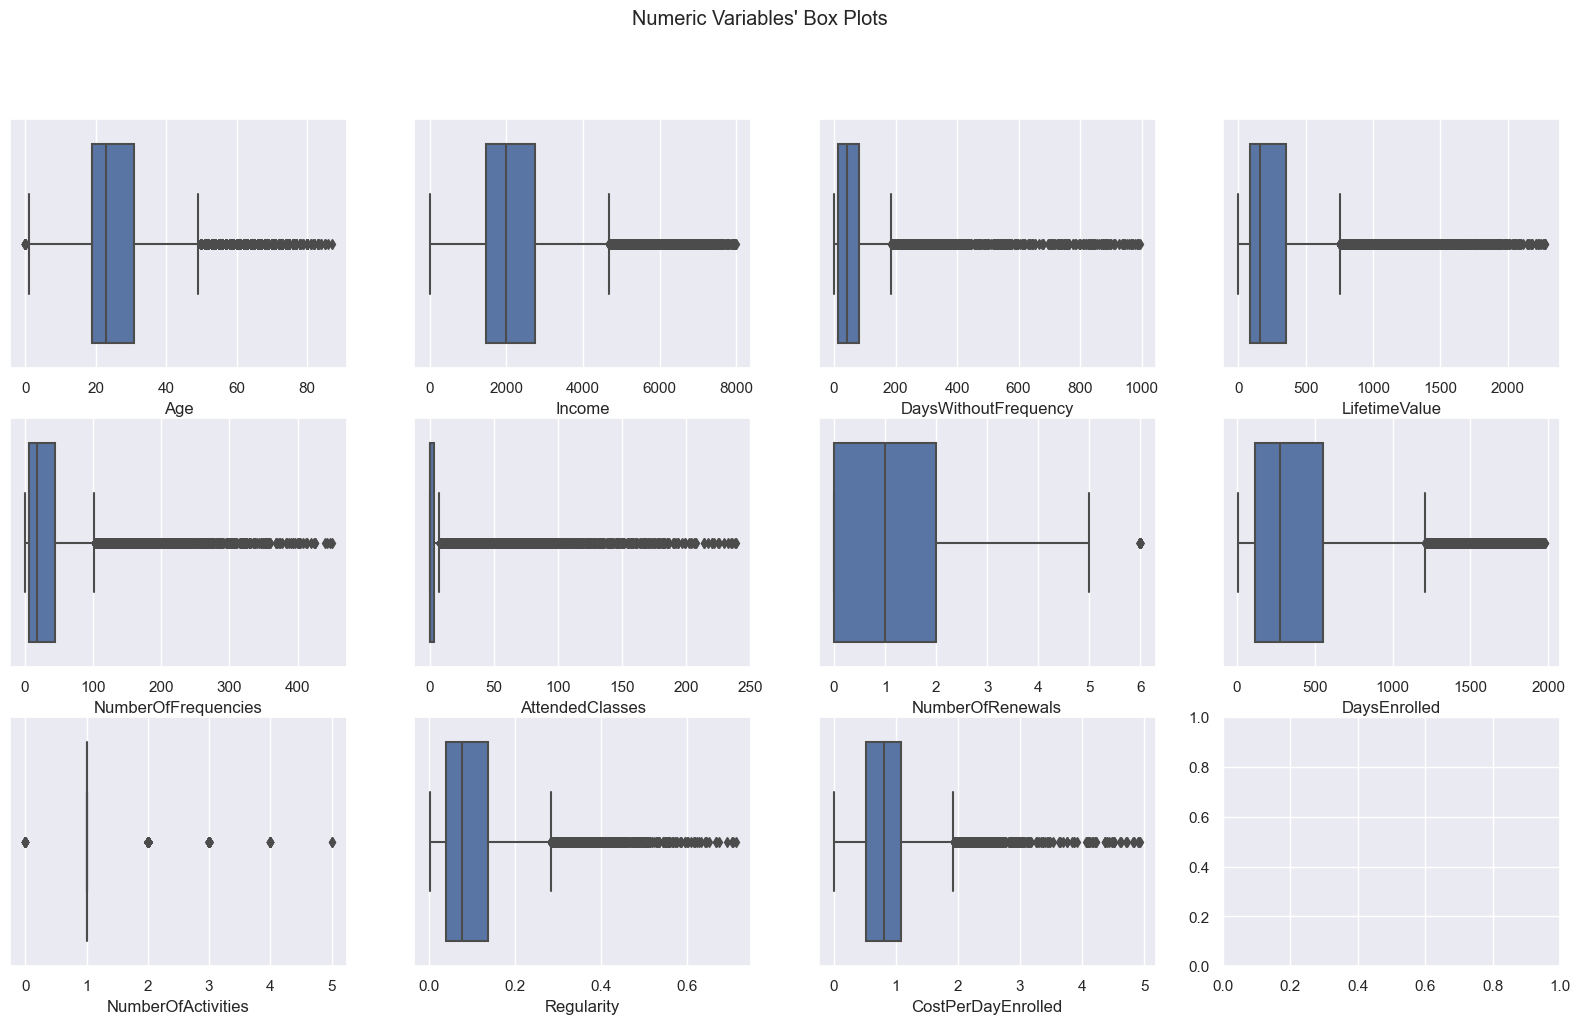

In [46]:
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_manual[feat], ax=ax)

plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__Outlier removal using only the IQR method__

In [47]:
df_iqr = df_copy.copy()

q25 = df_iqr[metric_features].quantile(.25)
q75 = df_iqr[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 4.5 * iqr
lower_lim = q25 - 4.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_iqr[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))

df_iqr = df_iqr.reset_index()[filters2]
df_out = df_iqr.reset_index()[~filters2]

print('Percentage of data kept after removing outliers:', np.round(df_iqr.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.7405


**Combining different outlier methods**

In [48]:
# More robust/consistent outlier detection method
# If I have an observation consider outlier in both of the approaches than I will call it an outlier
df_combo = df_copy[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_combo.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9877


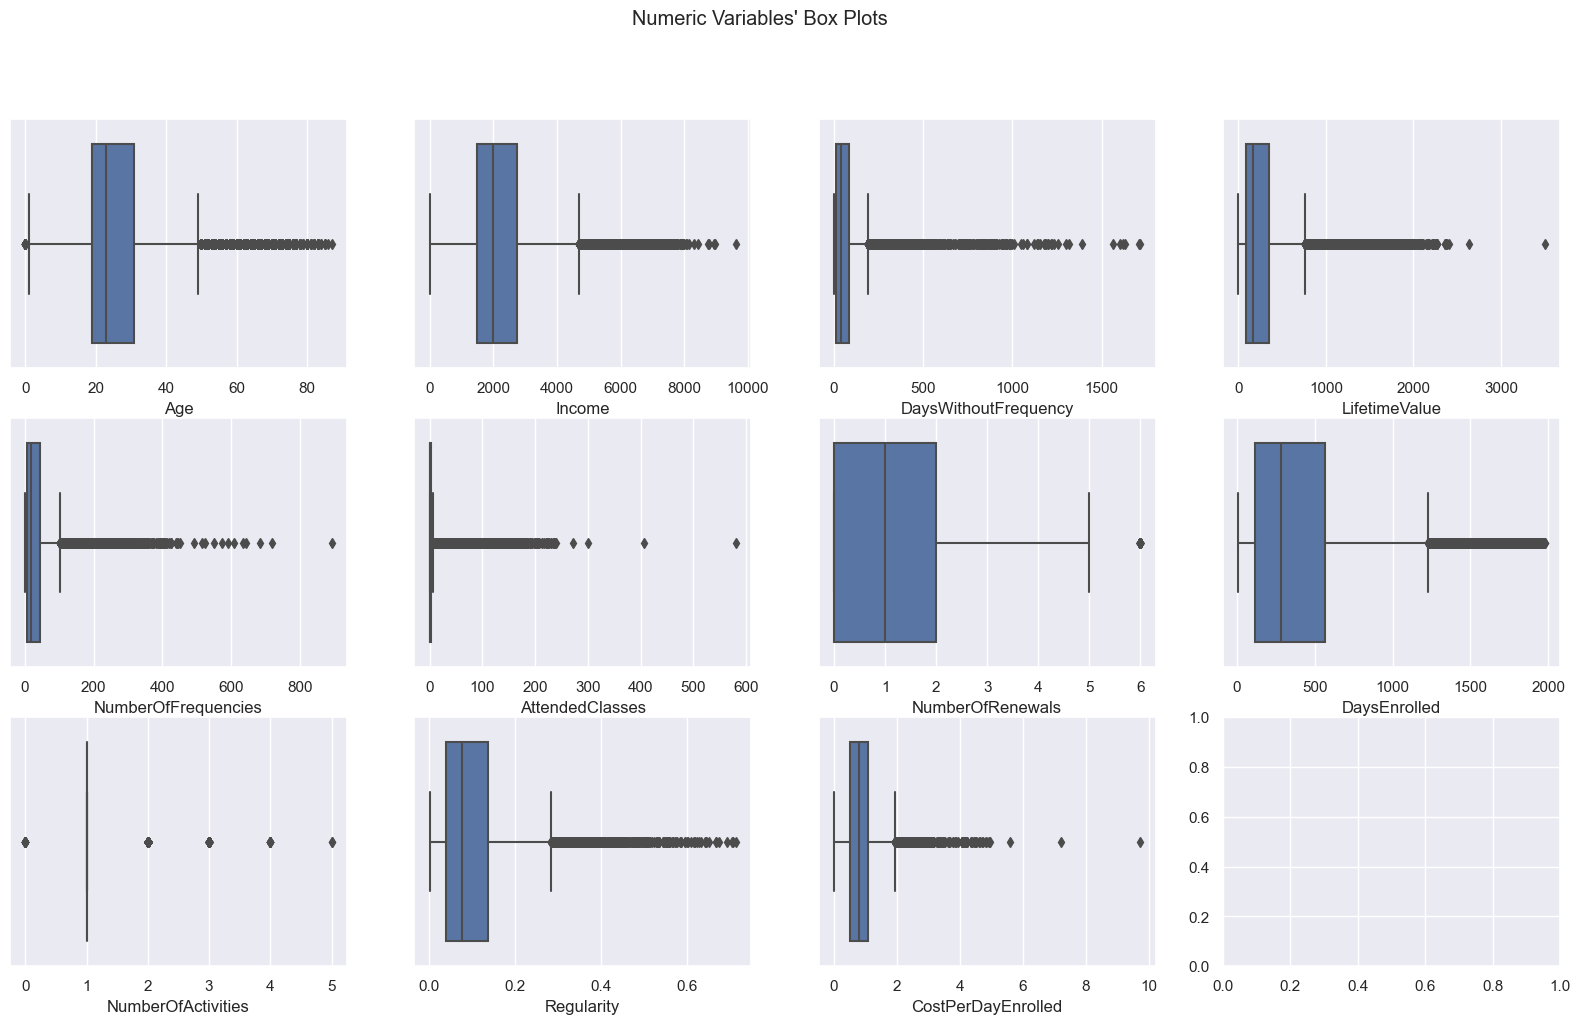

In [49]:
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_combo[feat], ax=ax)

plt.suptitle("Numeric Variables' Box Plots")
plt.show()

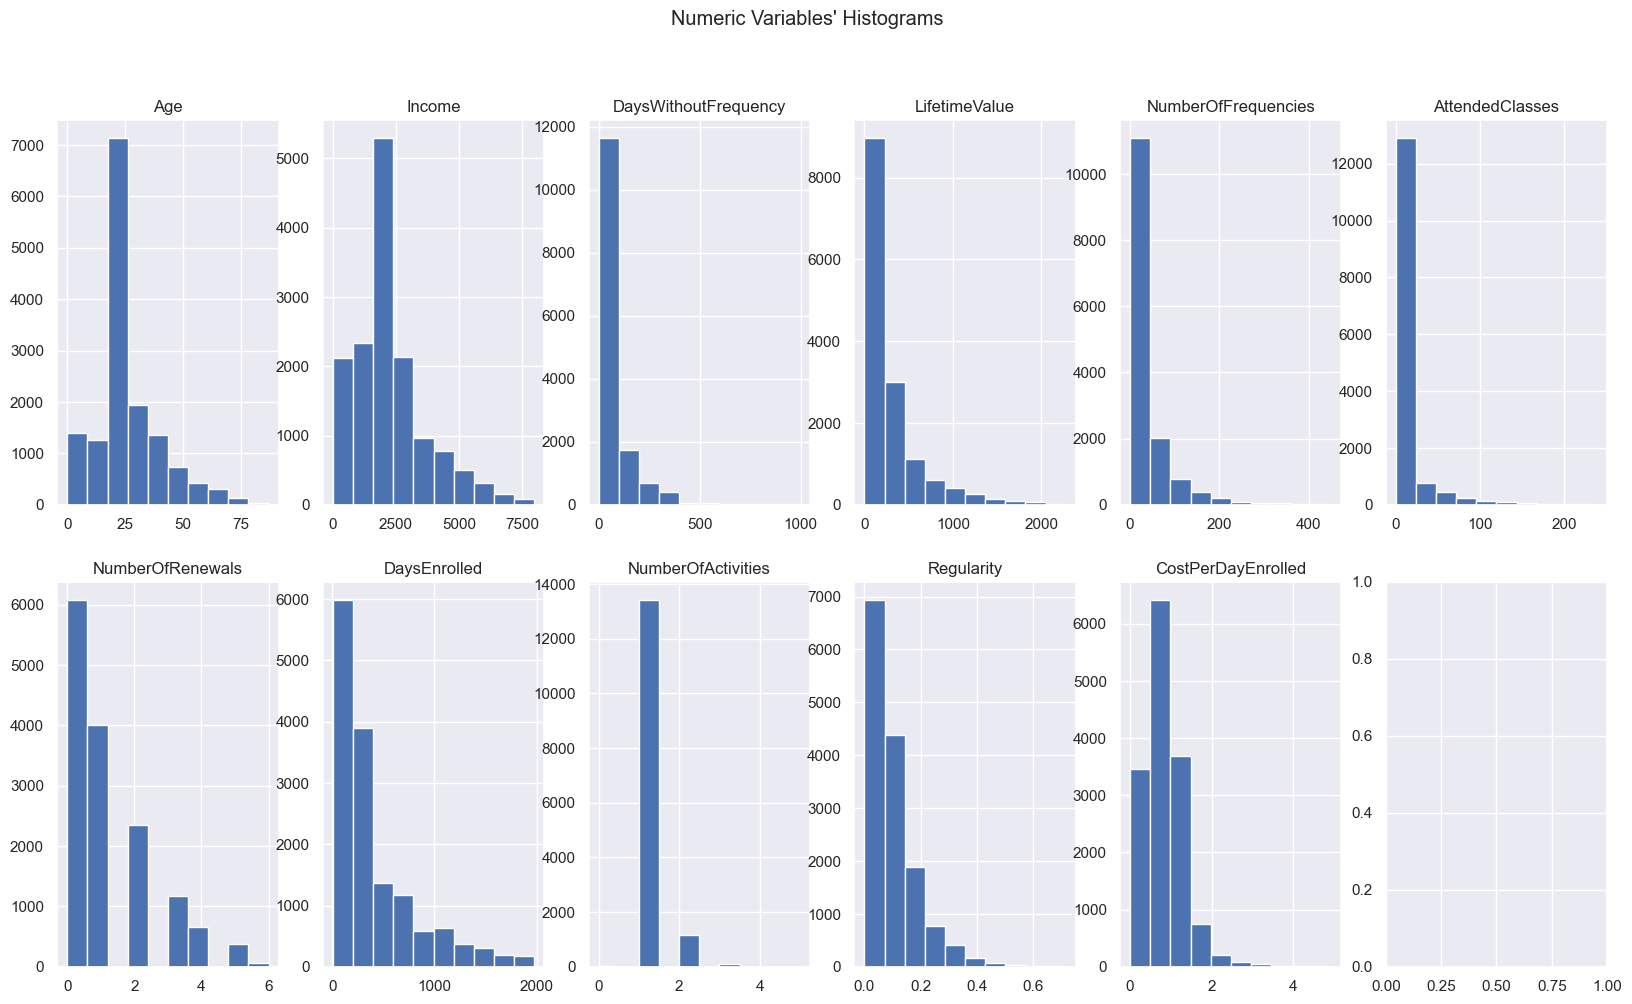

In [50]:
sns.set()
fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_manual[feat])
    ax.set_title(feat)
   
plt.suptitle("Numeric Variables' Histograms")
plt.show()

In [51]:
df_features = df_manual.copy()

In [52]:
df_features.drop('NumberOfRenewals', axis=1, inplace=True)

'NumberOfRenewals' has high correlation with DaysEnrolled and it is poorly distributed.

In [53]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'DaysEnrolled', 
                   'NumberOfActivities', 'Regularity', 'CostPerDayEnrolled']
bin_features = ['Gender', 'HasReferences', 'Dropout', 
                'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 
                'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities',]

In [54]:
df_features[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14698.0,25.859981,13.988666,0.000000,19.000000,23.000000,31.000000,87.000000
Income,14698.0,2207.984282,1509.202992,0.000000,1480.000000,1990.000000,2760.000000,7990.000000
DaysWithoutFrequency,14698.0,73.958021,108.494507,0.000000,13.000000,41.000000,82.000000,996.000000
LifetimeValue,14698.0,292.845035,337.423993,0.000000,83.600000,163.600000,350.535000,2273.500000
NumberOfFrequencies,14698.0,37.419480,52.672311,1.000000,7.000000,18.000000,45.000000,450.000000
AttendedClasses,14698.0,9.632059,26.071922,0.000000,0.000000,0.000000,3.000000,239.000000
DaysEnrolled,14698.0,415.176146,415.624364,8.000000,117.000000,278.000000,554.000000,1977.000000
NumberOfActivities,14698.0,1.092598,0.323595,0.000000,1.000000,1.000000,1.000000,5.000000
Regularity,14698.0,0.101837,0.090202,0.000517,0.038683,0.076923,0.136364,0.714286
CostPerDayEnrolled,14698.0,0.848610,0.499626,0.000000,0.513929,0.801931,1.078685,4.937778


## Scaling

__Use MinMaxScaler to scale the data:__

In [55]:
df_minmax = df_features.copy()

In [56]:
scaler = MinMaxScaler()
df_minmax[metric_features] = scaler.fit_transform(df_minmax[metric_features])
df_minmax.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,HasReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled
ID,,,,,,,,,,,,,,,,,,,,,
10000,0.689655,0,0.688360,0.001004,0.039301,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.017817,0.029289,0.0,0,0.025394,0.2,0.216674,0.311986
10001,0.333333,0,0.329161,0.060241,0.210776,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.048998,0.004184,0.0,1,0.198070,0.2,0.080239,0.243838
10002,0.264368,1,0.247810,0.007028,0.016538,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.011136,0.000000,0.0,1,0.011173,0.2,0.279478,0.253825
10003,0.103448,1,0.000000,0.022088,0.068353,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.042316,0.008368,0.0,1,0.077197,0.2,0.174402,0.196698
10004,0.402299,1,0.540676,0.210843,0.164152,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.089087,0.000000,0.0,1,0.391061,0.2,0.073108,0.097147


In [57]:
# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14698.0,0.30,0.16,0.0,0.22,0.26,0.36,1.0
Income,14698.0,0.28,0.19,0.0,0.19,0.25,0.35,1.0
DaysWithoutFrequency,14698.0,0.07,0.11,0.0,0.01,0.04,0.08,1.0
LifetimeValue,14698.0,0.13,0.15,0.0,0.04,0.07,0.15,1.0
NumberOfFrequencies,14698.0,0.08,0.12,0.0,0.01,0.04,0.10,1.0
AttendedClasses,14698.0,0.04,0.11,0.0,0.00,0.00,0.01,1.0
DaysEnrolled,14698.0,0.21,0.21,0.0,0.06,0.14,0.28,1.0
NumberOfActivities,14698.0,0.22,0.06,0.0,0.20,0.20,0.20,1.0
Regularity,14698.0,0.14,0.13,0.0,0.05,0.11,0.19,1.0
CostPerDayEnrolled,14698.0,0.17,0.10,0.0,0.10,0.16,0.22,1.0


__Use StandardScaler to scale the data:__

In [58]:
df_standard = df_features.copy()

In [59]:
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance.
df_standard[metric_features] = scaler.fit_transform(df_standard[metric_features])
df_standard.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,HasReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled
ID,,,,,,,,,,,,,,,,,,,,,
10000,2.440632,0,2.181368,-0.672481,-0.603105,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.539571,-0.100957,0.0,0,-0.859402,-0.286163,0.591313,1.384899
10001,0.224476,0,0.279638,-0.128656,0.552306,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.273768,-0.331098,0.0,1,-0.041328,-0.286163,-0.488337,0.711378
10002,-0.204457,1,-0.151068,-0.617177,-0.756478,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.596529,-0.369454,0.0,1,-0.926773,-0.286163,1.088297,0.810081
10003,-1.205301,1,-1.463063,-0.478916,-0.407350,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-0.330725,-0.292741,0.0,1,-0.613979,-0.286163,0.256804,0.245473
10004,0.653410,1,1.399472,1.253949,0.238151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.067980,-0.369454,0.0,1,0.872991,-0.286163,-0.544764,-0.738414


In [60]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14698.0,0.0,1.0,-1.85,-0.49,-0.20,0.37,4.37
Income,14698.0,-0.0,1.0,-1.46,-0.48,-0.14,0.37,3.83
DaysWithoutFrequency,14698.0,0.0,1.0,-0.68,-0.56,-0.30,0.07,8.50
LifetimeValue,14698.0,-0.0,1.0,-0.87,-0.62,-0.38,0.17,5.87
NumberOfFrequencies,14698.0,0.0,1.0,-0.69,-0.58,-0.37,0.14,7.83
AttendedClasses,14698.0,0.0,1.0,-0.37,-0.37,-0.37,-0.25,8.80
DaysEnrolled,14698.0,-0.0,1.0,-0.98,-0.72,-0.33,0.33,3.76
NumberOfActivities,14698.0,-0.0,1.0,-3.38,-0.29,-0.29,-0.29,12.08
Regularity,14698.0,0.0,1.0,-1.12,-0.70,-0.28,0.38,6.79
CostPerDayEnrolled,14698.0,-0.0,1.0,-1.70,-0.67,-0.09,0.46,8.18


# Clustering

In [61]:
df_cluster = df_standard.copy()

In [62]:
len(df_cluster[metric_features].columns)

10

In [63]:
def get_ss(df):
    ''' Computes the sum of squares for all variables given a dataset. '''
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return (1 - ssw/sst)
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    ''' Loop over different values of k.
        To be used with sklearn clusterers. '''
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df) 
        r2_clust[n] = r2(df, labels)
    return r2_clust

------------
### DBSCAN

In [ ]:
# # Grid search for parameters
# best_score = -1
# best_eps = 0
# best_min_samples = 0

# for eps in np.arange(1.0, 5.0, 0.1):
#     for min_samples in range(20, 30):
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
#         dbscan_labels = dbscan.fit_predict(df_cluster[metric_features])
        
#         # Check if there are at least two unique cluster labels
#         unique_labels = np.unique(dbscan_labels)
#         if len(unique_labels) > 2:
#             silhouette_avg = silhouette_score(df_cluster[metric_features], dbscan_labels)
            
#             if silhouette_avg > best_score:
#                 best_score = silhouette_avg
#                 best_eps = eps
#                 best_min_samples = min_samples

# print(f"Best Silhouette Score: {best_score}")
# print(f"Best eps: {best_eps}")
# print(f"Best min_samples: {best_min_samples}")

In [ ]:
# # Perform DBSCAN clustering
# dbscan = DBSCAN(eps=3, min_samples=20, n_jobs=-1)
# dbscan_labels = dbscan.fit_predict(df_cluster[metric_features])

# dbscan_n_clusters = len(np.unique(dbscan_labels))
# print("Number of estimated clusters : %d" % dbscan_n_clusters)
# print(Counter(dbscan_labels))

In [ ]:
# # K-distance graph to find out the right eps value
# neigh = NearestNeighbors(n_neighbors=20)
# neigh.fit(df_cluster[metric_features])
# distances, _ = neigh.kneighbors(df_cluster[metric_features])
# distances = np.sort(distances[:, -1])
# plt.plot(distances)
# plt.show()

In [ ]:
# # Concatenating the labels to df
# df_concat = pd.concat([df_cluster[metric_features], pd.Series(dbscan_labels, index=df_cluster.index, name="dbscan_labels")], axis=1)
# df_concat.groupby('dbscan_labels').mean()

In [ ]:
# # Computing the R^2 of the cluster solution
# df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
# sst = get_ss(df_cluster[metric_features])  # get total sum of squares
# ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

In [ ]:
# def cluster_profiles_dbscan(df, label_column, figsize, compar_title=""):
#     """
#     Pass df with a single clustering label column using DBSCAN.
#     Exclude outliers (label -1) from the analysis.
#     """
#     sns.set()
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize, squeeze=False)

#     # Exclude outliers (label -1)
#     df_filtered = df[df[label_column] >= 0]
    
#     # Getting the cluster centroids and counts
#     centroids = df_filtered.groupby(by=label_column, as_index=False).mean()
#     counts = df_filtered[label_column].value_counts().reset_index()
#     counts.columns = [label_column, 'counts']
    
#     # Setting Data
#     pd.plotting.parallel_coordinates(centroids, label_column, color=sns.color_palette(), ax=axes[0, 0])
#     bar_plot = sns.barplot(x=label_column, y='counts', data=counts, ax=axes[0, 1])

#     # Annotating each bar with absolute frequency
#     for p in bar_plot.patches:
#         bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
#     # Setting Layout
#     handles, _ = axes[0, 0].get_legend_handles_labels()
#     cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
    
    # axes[0, 0].annotate(text=compar_title, xy=(0.95, 1.1), xycoords='axes fraction', fontsize=12, fontweight='heavy') 
    # axes[0, 0].legend(handles, cluster_labels)
    # axes[0, 0].axhline(color="black", linestyle="--")
    # axes[0, 0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=12)
    # axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=20, ha='right')
    
    # axes[0, 1].set_xticklabels(cluster_labels)
    # axes[0, 1].set_xlabel("")
    # axes[0, 1].set_ylabel("Absolute Frequency")
    # axes[0, 1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=12)
    
    # plt.subplots_adjust(hspace=1.0, top=0.8)
    # plt.suptitle("DBSCAN Cluster Simple Profiling (Excluding Outliers)", fontsize=16)
    # plt.show()

In [ ]:
# # Profiling a single DBSCAN clustering
# cluster_profiles_dbscan(
#     df=df_concat[metric_features + ['dbscan_labels']], 
#     label_column='dbscan_labels', 
#     figsize=(20, 5), 
#     compar_title="DBSCAN Clustering"
# )

In [ ]:
# # Characterizing the final clusters
# df_concat_all = pd.concat((df_cluster, pd.Series(dbscan_labels, index=df_cluster.index, name="dbscan_labels")), axis=1)
# df_concat_all.groupby('dbscan_labels').mean()

In [ ]:
# df_concat_all[['dbscan_labels',
#                'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
#                'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities',
#                'Gender', 'HasReferences', 'Dropout']].groupby('dbscan_labels').mean()

#### Cluster visualization using t-SNE

In [ ]:
# two_dim = TSNE(random_state=42).fit_transform(df[metric_features])

In [ ]:
# # t-SNE visualization
# pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
# plt.show()

----
### MeanShift

In [ ]:
# # The following bandwidth can be automatically detected using (we need to set quantile though)
# # Based on distance to nearest neighbors for all observations
# bandwidth = estimate_bandwidth(df_cluster[metric_features], quantile=0.5, random_state=1, n_jobs=-1)
# bandwidth

In [ ]:
# # Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
# ms_labels = ms.fit_predict(df_cluster[metric_features])

# ms_n_clusters = len(np.unique(ms_labels))
# print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
# # Concatenating the labels to df_cluster
# df_concat = pd.concat([df_cluster[metric_features], pd.Series(ms_labels, index=df_cluster.index, name="ms_labels")], axis=1)
# df_concat.head()

In [ ]:
# # Computing the R^2 of the cluster solution
# sst = get_ss(df_cluster[metric_features])  # get total sum of squares
# ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

-----------
### GMM

In [ ]:
# # Performing GMM clustering
# gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
# gmm_labels = gmm.fit_predict(df_cluster[metric_features])
# labels_proba = gmm.predict_proba(df_cluster[metric_features])

In [ ]:
# The estimated component weights
#gmm.weights_

In [ ]:
# The estimated mean vectors of the Components
#gmm.means_

In [ ]:
# The estimated covariance matrices of the Components
#gmm.covariances_.shape

In [ ]:
# # Selecting number of components based on AIC and BIC
# n_components = np.arange(1, 16)
# models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_cluster[metric_features])
#           for n in n_components]

# bic_values = [m.bic(df_cluster[metric_features]) for m in models]
# aic_values = [m.aic(df_cluster[metric_features]) for m in models]
# plt.plot(n_components, bic_values, label='BIC')
# plt.plot(n_components, aic_values, label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components')
# plt.xticks(n_components)
# plt.show()

In [ ]:
# # Concatenating the labels to df
# df_concat = pd.concat([df_cluster[metric_features], pd.Series(gmm_labels, index=df_cluster.index, name="gmm_labels")], axis=1)
# df_concat.head()

In [ ]:
# # Computing the R^2 of the cluster solution
# sst = get_ss(df_cluster[metric_features])  # get total sum of squares
# ssw_labels = df_concat.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

------
------

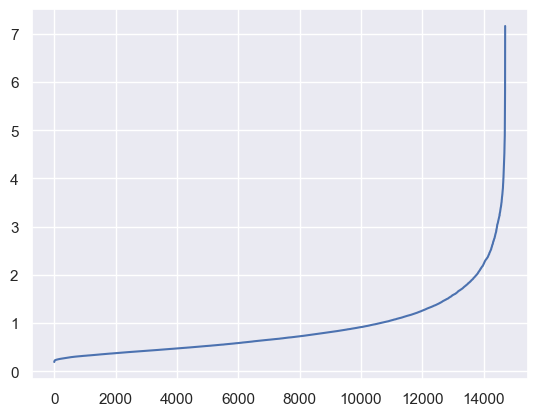

In [66]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_cluster[metric_features])
distances, _ = neigh.kneighbors(df_cluster[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [67]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_cluster[metric_features])
Counter(dbscan_labels)

Counter({0: 13268, 1: 1003, -1: 427})

In [68]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df_cluster[dbscan_labels==-1].copy() # this has all the noise rows

# New df without outliers
df_new = df_cluster[dbscan_labels!=-1].copy()

## Clustering by Perspectives

**For all analysis:**

In [69]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=20)
    plt.show()

**Define the perspetives:**

In [70]:
demographic_features = [
    'Age',
    'Gender',
    'Income'    
]

behavior_features = [
    'DaysWithoutFrequency',  
    'LifetimeValue',
    'NumberOfFrequencies', 
    'AttendedClasses',       
    'HasReferences',         
    'DaysEnrolled',          
    'NumberOfActivities',
    'Regularity',            
    'CostPerDayEnrolled',    
    'Dropout'
]

df_dem = df_new[demographic_features].copy()
df_beh = df_new[behavior_features].copy()

### Social Demographic perspective

In [71]:
df_dem

,Age,Gender,Income
ID,,,
10000,2.440632,0,2.181368
10001,0.224476,0,0.279638
10002,-0.204457,1,-0.151068
10003,-1.205301,1,-1.463063
10004,0.653410,1,1.399472
...,...,...,...
24936,-0.347435,0,-0.257088
24937,-0.847857,1,-1.463063
24938,0.939365,1,0.507580


In [72]:
# Set up the clusterers
kmeans = KMeans(init='k-means++', n_init=20, random_state=42)
hierarchical = AgglomerativeClustering(metric='euclidean')

In [ ]:
# Visualizing the R² scores for each cluster solution
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(df_dem, hierarchical.set_params(linkage=linkage))

In [ ]:
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))
plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=18)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [73]:
kmeans_dem = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
km_dem_labels = kmeans_dem.fit_predict(df_dem)
Counter(km_dem_labels)

Counter({2: 9573, 1: 2514, 0: 2184})

In [74]:
df_kmeans_dem = pd.concat([df_dem, pd.Series(km_dem_labels, name='km_dem_labels', index=df_dem.index)], axis=1)

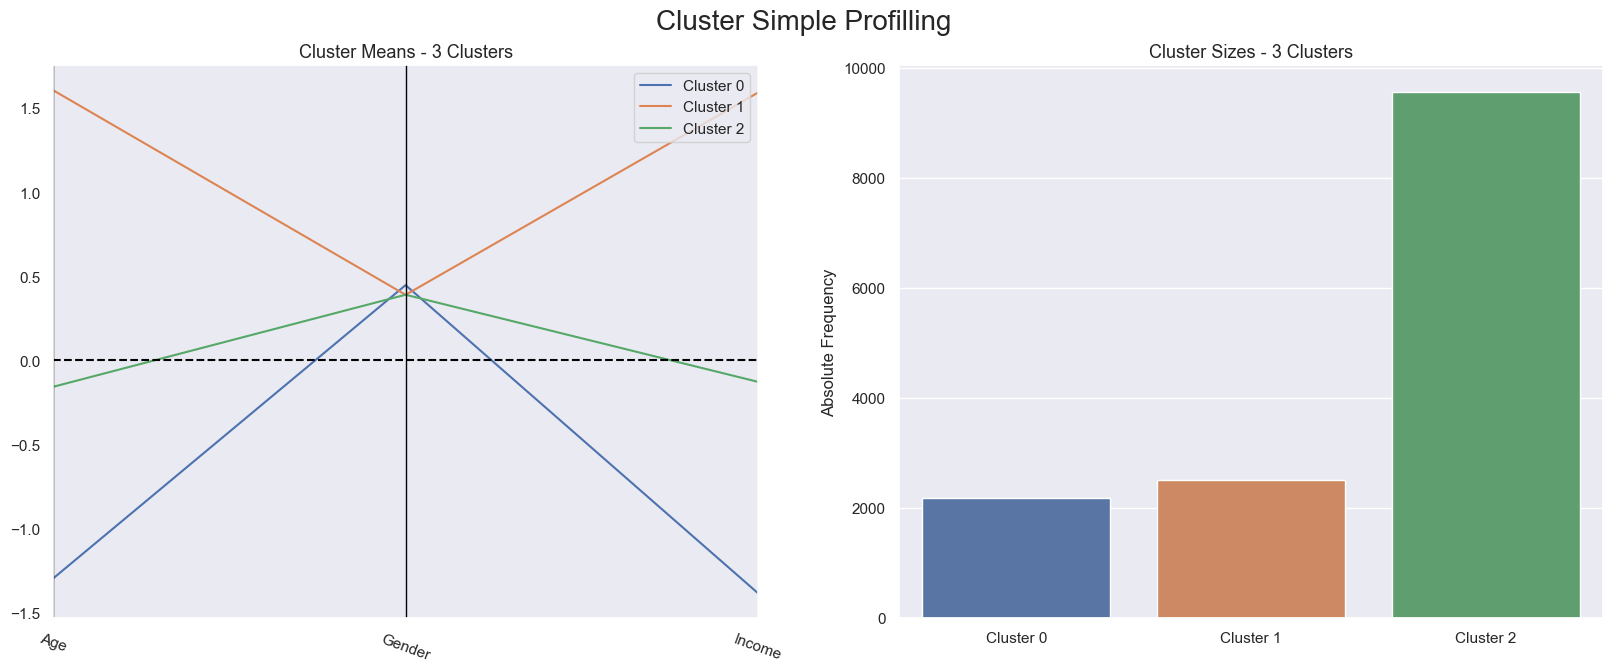

In [77]:
cluster_profiles(df_kmeans_dem, ['km_dem_labels'], (20,7))

In [76]:
df_kmeans_dem.groupby('km_dem_labels')[demographic_features].mean()

,Age,Gender,Income
km_dem_labels,,,
0,-1.295415,0.447802,-1.383335
1,1.606197,0.390215,1.592383
2,-0.156506,0.390682,-0.127028


### Behavior perspective

In [78]:
df_beh

,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,HasReferences,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled,Dropout
ID,,,,,,,,,,
10000,-0.672481,-0.603105,-0.539571,-0.100957,0.0,-0.859402,-0.286163,0.591313,1.384899,0
10001,-0.128656,0.552306,-0.273768,-0.331098,0.0,-0.041328,-0.286163,-0.488337,0.711378,1
10002,-0.617177,-0.756478,-0.596529,-0.369454,0.0,-0.926773,-0.286163,1.088297,0.810081,1
10003,-0.478916,-0.407350,-0.330725,-0.292741,0.0,-0.613979,-0.286163,0.256804,0.245473,1
10004,1.253949,0.238151,0.067980,-0.369454,0.0,0.872991,-0.286163,-0.544764,-0.738414,1
...,...,...,...,...,...,...,...,...,...,...
24936,0.018822,-0.498929,-0.482613,-0.369454,0.0,-0.298780,-0.286163,-0.671840,-0.842208,1
24937,-0.663264,3.460467,1.415982,3.312793,0.0,1.763248,-0.286163,-0.047401,0.847782,0
24938,-0.331438,0.151165,0.371755,-0.369454,0.0,-0.370963,-0.286163,1.292188,0.938381,1


In [79]:
# Set up the clusterers
kmeans = KMeans(init='k-means++', n_init=20, random_state=42)
hierarchical = AgglomerativeClustering(metric='euclidean')

In [ ]:
# Visualizing the R² scores for each cluster solution
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_beh, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(df_beh, hierarchical.set_params(linkage=linkage))

In [ ]:
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))
plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=18)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [80]:
kmeans_beh = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
km_beh_labels = kmeans_beh.fit_predict(df_beh)
Counter(km_beh_labels)

Counter({0: 6485, 1: 5959, 2: 1827})

In [81]:
df_kmeans_beh = pd.concat([df_beh, pd.Series(km_beh_labels, name='km_beh_labels', index=df_beh.index)], axis=1)

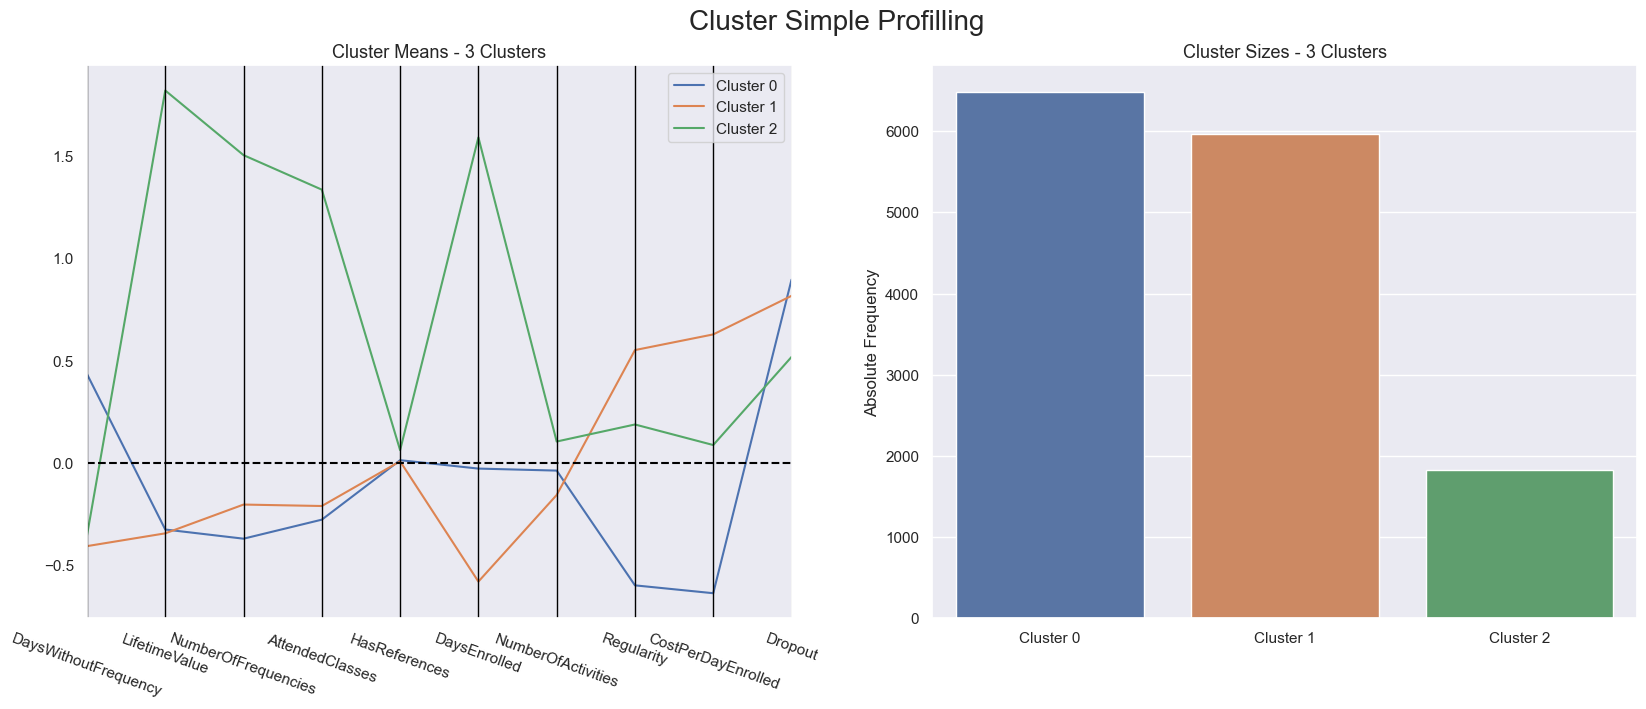

In [82]:
cluster_profiles(df_kmeans_beh, ['km_beh_labels'], (20,7))

In [83]:
df_kmeans_beh.groupby('km_beh_labels')[behavior_features].mean()

,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,HasReferences,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled,Dropout
km_beh_labels,,,,,,,,,,
0,0.434138,-0.325203,-0.370027,-0.277061,0.013416,-0.027621,-0.037407,-0.597963,-0.636392,0.895297
1,-0.406371,-0.343900,-0.203338,-0.210415,0.008055,-0.579600,-0.156511,0.551278,0.627808,0.816244
2,-0.354363,1.819250,1.503412,1.334870,0.062397,1.589968,0.104576,0.187824,0.087437,0.517789


In [84]:
df_new['demographic_labels'] = km_dem_labels
df_new['behavior_labels'] = km_beh_labels

# Count label frequencies (contigency table)
pd.crosstab(df_new['demographic_labels'],
            df_new['behavior_labels'])

behavior_labels,0,1,2
demographic_labels,,,
0,611,845,728
1,928,1199,387
2,4946,3915,712


### Manual merging: Merge lowest frequency clusters into closest clusters

In [ ]:
# # Centroids of clusters
# df_centroids = df_new.groupby(['financial_labels', 'membership_labels'])[metric_features].mean()

# # Clusters with low frequency to be merged:
# to_merge = [(0,2), (1,1), (1,2), (2,0), (2,1)]

# # Computing the euclidean distance matrix between the centroids
# euclidean = pairwise_distances(df_centroids)
# df_dists = pd.DataFrame(euclidean, columns=df_centroids.index, index=df_centroids.index)

# # Merging each low frequency clustering (source) to the closest cluster (target)
# source_target = {}
# for clus in to_merge:
#     if clus not in source_target.values():
#         source_target[clus] = df_dists.loc[clus].sort_values().index[1]

# source_target

In [ ]:
# df_ = df_new.copy()

# # Changing the behavior_labels and product_labels based on source_target
# for source, target in source_target.items():
#     mask = (df_['financial_labels']==source[0]) & (df_['membership_labels']==source[1])
#     df_.loc[mask, 'financial_labels'] = target[0]
#     df_.loc[mask, 'membership_labels'] = target[1]

# # New contigency table
# pd.crosstab(df_['financial_labels'],
#             df_['membership_labels'])

In [ ]:
# # Centroids of clusters
# df_centroids = df_.groupby(['financial_labels', 'membership_labels'])[metric_features].mean()

# # Clusters with low frequency to be merged:
# to_merge = [(2,0)]

# # Computing the euclidean distance matrix between the centroids
# euclidean = pairwise_distances(df_centroids)
# df_dists = pd.DataFrame(euclidean, columns=df_centroids.index, index=df_centroids.index)

# # Merging each low frequency clustering (source) to the closest cluster (target)
# source_target = {}
# for clus in to_merge:
#     if clus not in source_target.values():
#         source_target[clus] = df_dists.loc[clus].sort_values().index[1]


# # Changing the behavior_labels and product_labels based on source_target
# for source, target in source_target.items():
#     mask = (df_['financial_labels']==source[0]) & (df_['membership_labels']==source[1])
#     df_.loc[mask, 'financial_labels'] = target[0]
#     df_.loc[mask, 'membership_labels'] = target[1]

# # New contigency table
# pd.crosstab(df_['financial_labels'],
#             df_['membership_labels'])

### Merging using Hierarchical clustering

In [85]:
# Centroids of the concatenated cluster labels
df_centroids = df_new.groupby(['demographic_labels', 'behavior_labels'])[metric_features].mean()
df_centroids

Age    Income  DaysWithoutFrequency  \
demographic_labels behavior_labels                                             
0                  0               -1.224490 -1.388014              0.579814   
                   1               -1.351494 -1.365065             -0.421834   
                   2               -1.289850 -1.400615             -0.387312   
1                  0                1.516592  1.553144              0.525668   
                   1                1.621282  1.590516             -0.400204   
                   2                1.774326  1.692263             -0.365688   
2                  0               -0.174248 -0.144859              0.398968   
                   1               -0.133899 -0.119919             -0.404923   
                   2               -0.157567 -0.042248             -0.314518   

                                    LifetimeValue  NumberOfFrequencies  \
demographic_labels behavior_labels                                       
0                  0                     0.082610            -0.472203   
                   1                    -0.078151            -0.361453   
                   2                     2.375124             0.863877   
1                  0                    -0.178926            -0.349139   
                   1                    -0.267216            -0.134890   
                   2                     1.606969             2.019804   
2                  0                    -0.403027            -0.361324   
                   1                    -0.424743            -0.190174   
                   2                     1.366269             1.876640   

                                    AttendedClasses  DaysEnrolled  \
demographic_labels behavior_labels                                  
0                  0                      -0.012379      0.063958   
                   1                       0.154104     -0.479856   
                   2                       2.384486      1.604653   
1                  0                      -0.244134      0.074331   
                   1                      -0.232151     -0.545152   
                   2                       0.443372      1.603077   
2                  0                      -0.315936     -0.058063   
                   1                      -0.282434     -0.611678   
                   2                       0.746231      1.567827   

                                    NumberOfActivities  Regularity  \
demographic_labels behavior_labels                                   
0                  0                         -0.114193   -0.785024   
                   1                         -0.223989   -0.200610   
                   2                         -0.103626   -0.224065   
1                  0                          0.000231   -0.635839   
                   1                         -0.123782    0.589814   
                   2                          0.184982    0.481269   
2                  0                         -0.034983   -0.567748   
                   1                         -0.151970    0.701761   
                   2                          0.273753    0.449469   

                                    CostPerDayEnrolled  
demographic_labels behavior_labels                      
0                  0                         -0.128043  
                   1                          1.145660  
                   2                          0.418709  
1                  0                         -0.480299  
                   1                          0.723072  
                   2                         -0.059662  
2                  0                         -0.728478  
                   1                          0.486861  
                   2                         -0.171325

In [86]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None)

hclust_labels = hclust.fit_predict(df_centroids)

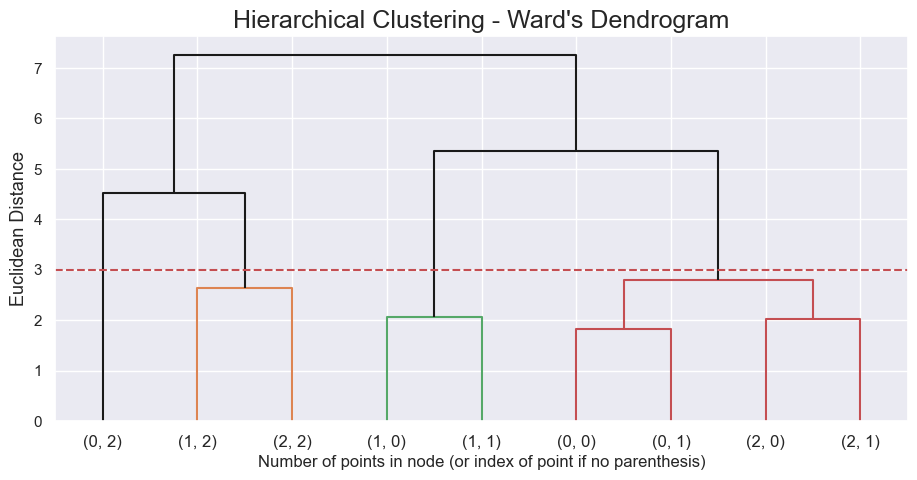

In [88]:
# Create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])  # hclust.children_ contains the observation ids that are being merged together
n_samples = len(hclust.labels_)

# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack([hclust.children_, hclust.distances_, counts]).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, 
           truncate_mode = 'level', 
           labels = df_centroids.index,
           p = 5,
           color_threshold = y_threshold,
           above_threshold_color = 'k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=18)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [89]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4)

hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

In [90]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_new.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['demographic_labels'], row['behavior_labels'])], axis=1)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled
merged_labels,,,,,,,,,,
0,-0.317556,-0.308957,0.037398,-0.355898,-0.302955,-0.246748,-0.295464,-0.099547,-0.068804,-0.078234
1,0.522726,0.568540,-0.332537,1.451029,1.927054,0.639583,1.580240,0.242494,0.460667,-0.132004
2,1.575606,1.574210,0.003750,-0.228695,-0.228366,-0.237379,-0.274874,-0.069676,0.055068,0.198047
3,-1.289850,-1.400615,-0.387312,2.375124,0.863877,2.384486,1.604653,-0.103626,-0.224065,0.418709


In [91]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels').size().to_frame()

# Getting the product and behavior labels
df_counts = df_counts.rename({v:k for k, v in cluster_mapper.items()}).reset_index()

df_counts['demographic_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='demographic_labels', columns='behavior_labels')

behavior_labels,1,2
demographic_labels,,
0,NaN,728.0
1,2127.0,NaN
2,10317.0,1099.0


### Cluster Analysis

In [92]:
# Setting df to have the final product, behavior and merged clusters
df_final = df_.copy()

In [93]:
more_features = demographic_features + behavior_features

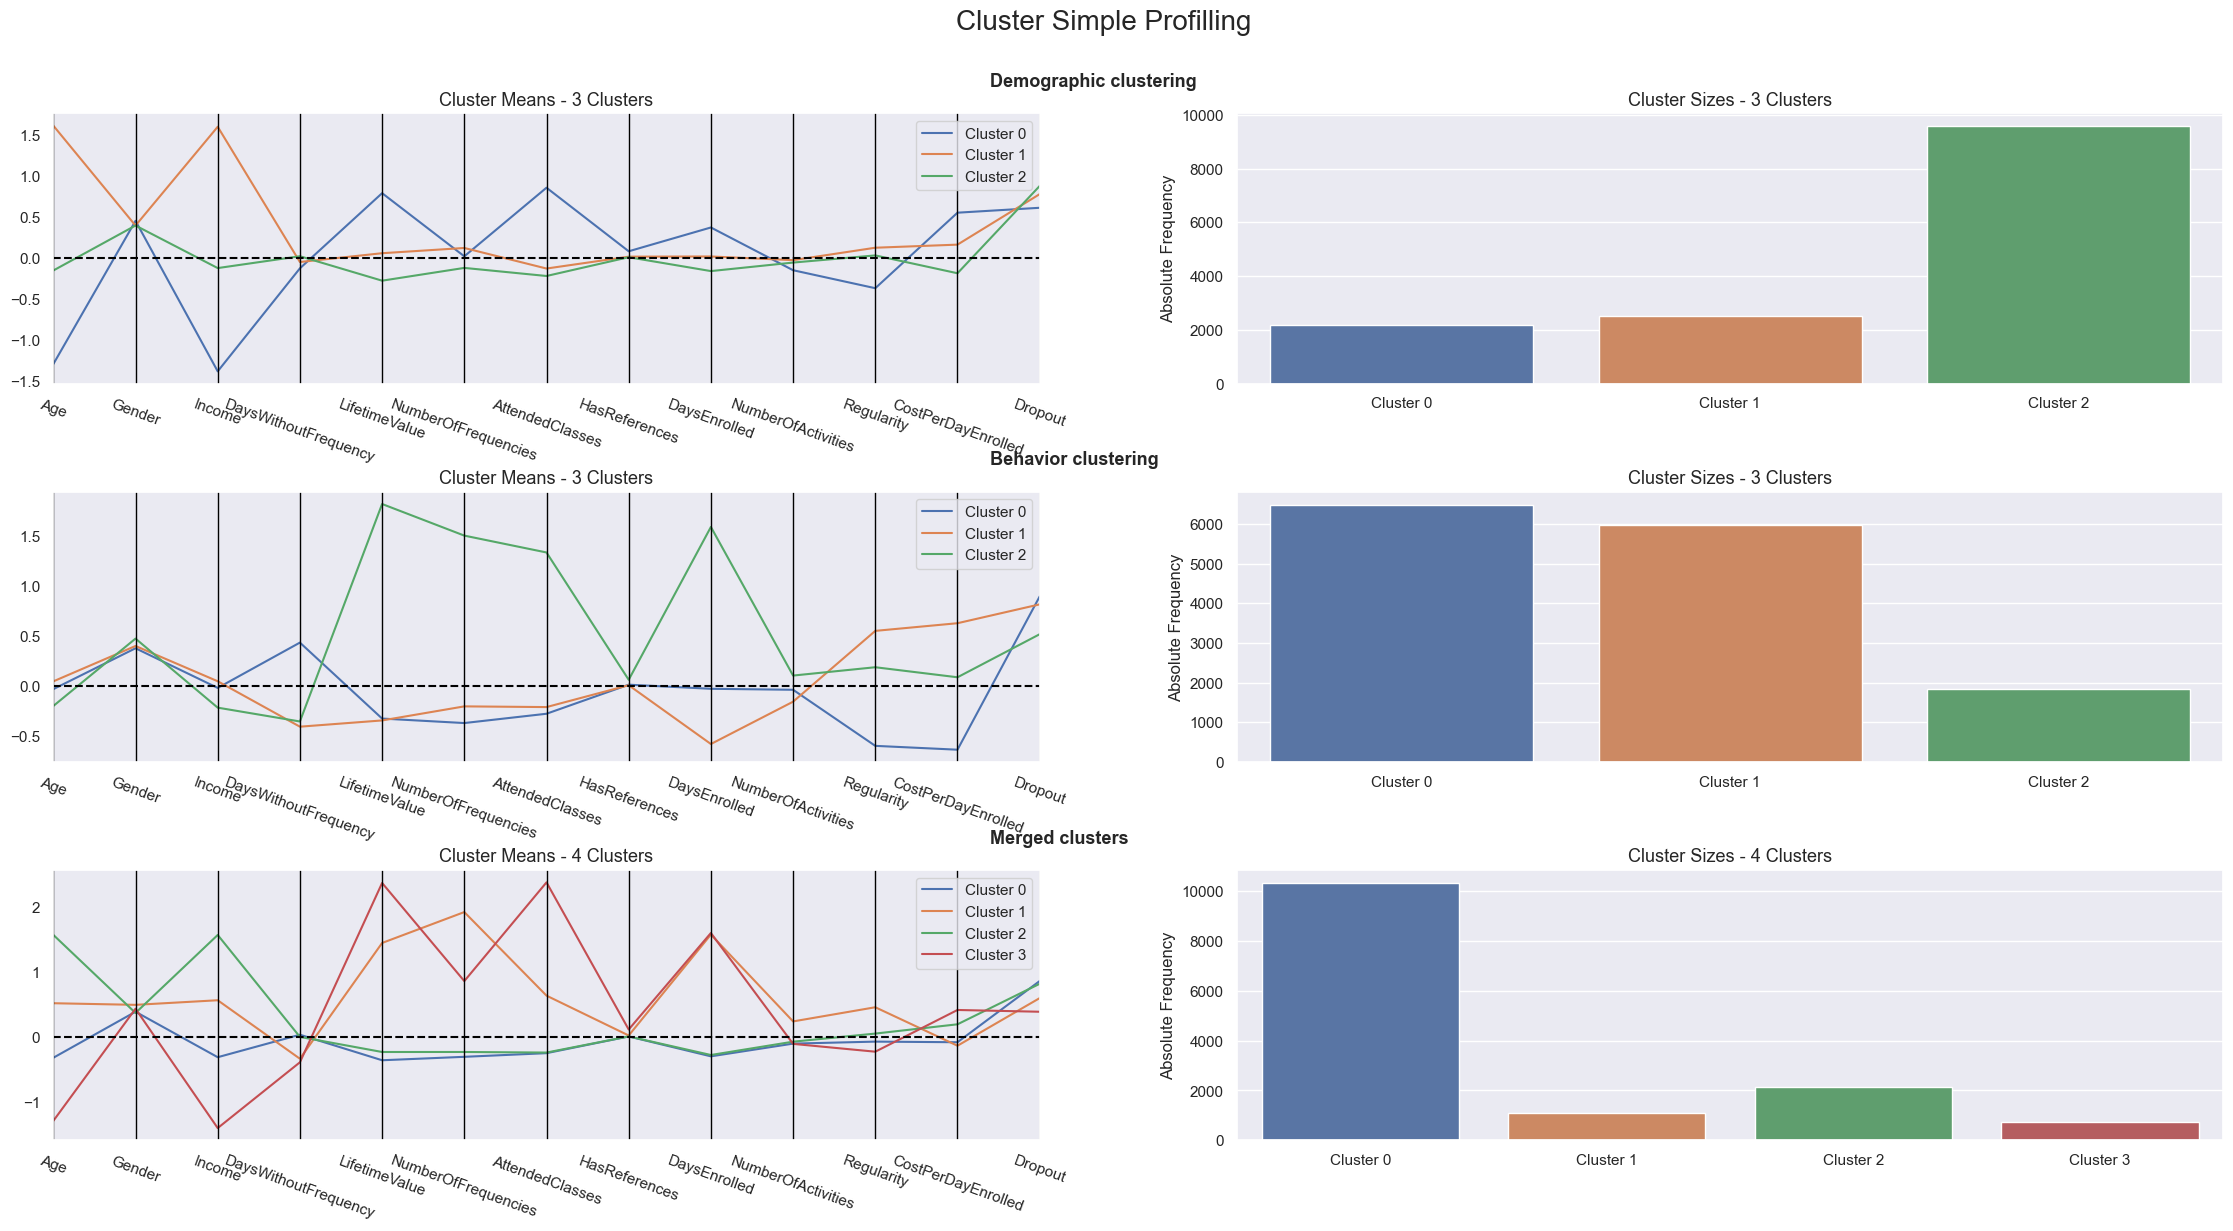

In [95]:
# Profilling each cluster (behavior, member, merged)
cluster_profiles(
    df = df_final[more_features + ['demographic_labels', 'behavior_labels', 'merged_labels']], 
    label_columns = ['demographic_labels', 'behavior_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Behavior clustering", "Merged clusters"]
)

In [96]:
Counter(df_['merged_labels'])

Counter({0: 10317, 2: 2127, 1: 1099, 3: 728})

In [97]:
df_final.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'HasReferences', 'Dropout', 'DaysEnrolled',
       'NumberOfActivities', 'Regularity', 'CostPerDayEnrolled',
       'demographic_labels', 'behavior_labels', 'merged_labels'],
      dtype='object')

In [98]:
df_.groupby(['merged_labels']).mean()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,NumberOfFrequencies,AttendedClasses,HasReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled,demographic_labels,behavior_labels
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,-0.317556,0.391587,-0.308957,0.037398,-0.355898,0.006106,0.234661,0.613841,0.053989,0.024232,...,-0.302955,-0.246748,0.010759,0.864689,-0.295464,-0.099547,-0.068804,-0.078234,1.717747,0.461374
1,0.522726,0.497725,0.568540,-0.332537,1.451029,0.005460,0.395814,0.515014,0.081893,0.024568,...,1.927054,0.639583,0.025478,0.601456,1.580240,0.242494,0.460667,-0.132004,1.647862,2.000000
2,1.575606,0.372826,1.574210,0.003750,-0.228695,0.011754,0.247297,0.632816,0.018336,0.017395,...,-0.228366,-0.237379,0.011283,0.822285,-0.274874,-0.069676,0.055068,0.198047,1.000000,0.563705
3,-1.289850,0.438187,-1.400615,-0.387312,2.375124,0.004121,0.935440,0.000000,0.061813,0.004121,...,0.863877,2.384486,0.118132,0.391484,1.604653,-0.103626,-0.224065,0.418709,0.000000,2.000000


locator: <matplotlib.ticker.AutoLocator object at 0x000001993CB813D0>


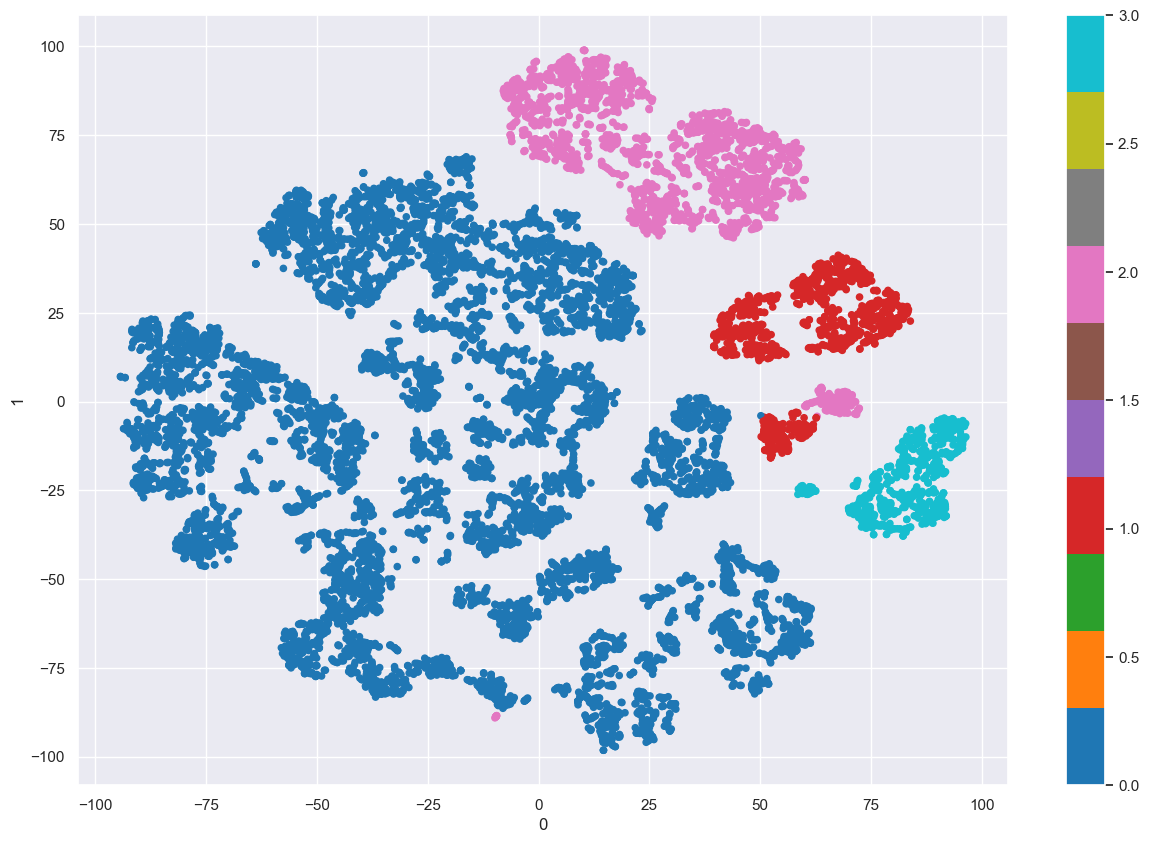

In [99]:
two_dim = TSNE(random_state=42).fit_transform(df_)

pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

locator: <matplotlib.ticker.AutoLocator object at 0x000001993CB28C50>


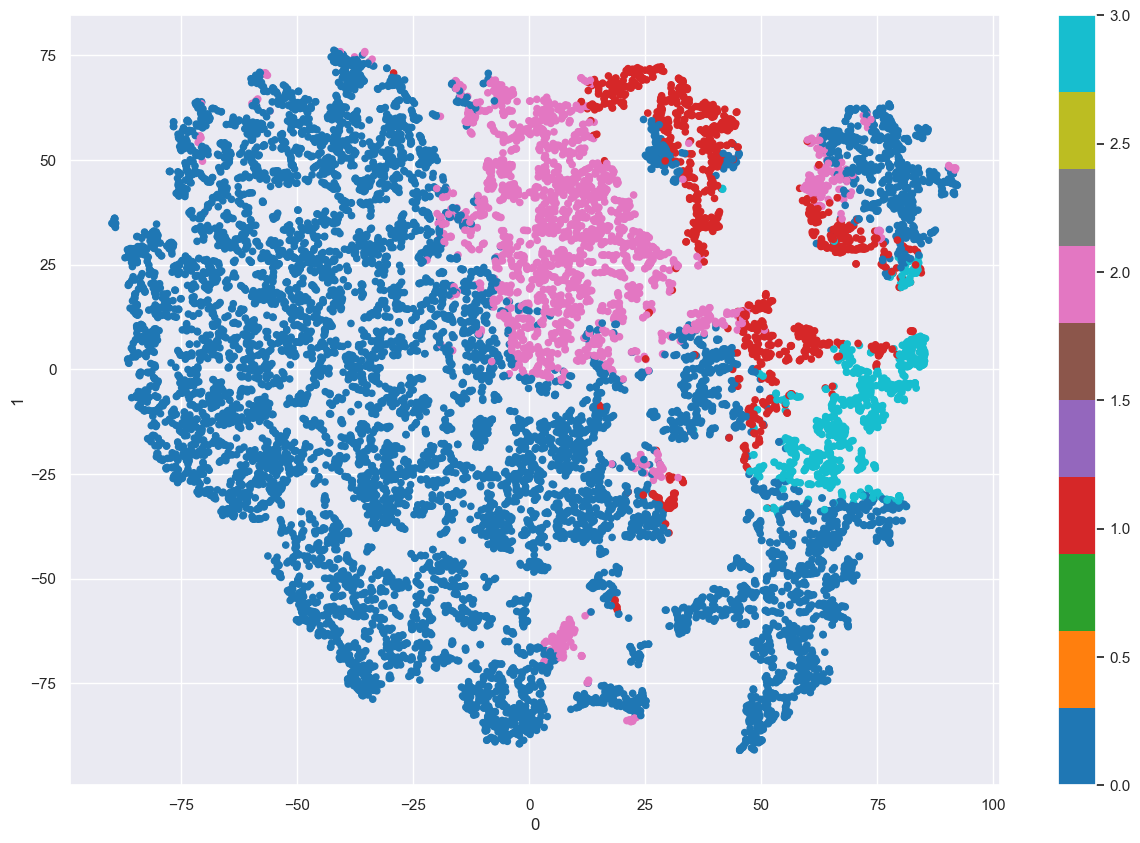

In [100]:
two_dim = TSNE(random_state=42).fit_transform(df_[metric_features])

pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

#### Profiling with unused features

In [102]:
df_activ = df_[['merged_labels',
              'AthleticsActivities',
              'WaterActivities',
              'FitnessActivities',
              'TeamActivities',
              'RacketActivities',
              'CombatActivities',
              'SpecialActivities',
              'OtherActivities']].groupby(['merged_labels']).sum()
df_activ

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,63.0,2421.0,6333.0,557.0,250.0,1225.0,76.0,15.0
1,6.0,435.0,566.0,90.0,27.0,93.0,70.0,0.0
2,25.0,526.0,1346.0,39.0,37.0,142.0,149.0,12.0
3,3.0,681.0,0.0,45.0,3.0,38.0,1.0,0.0


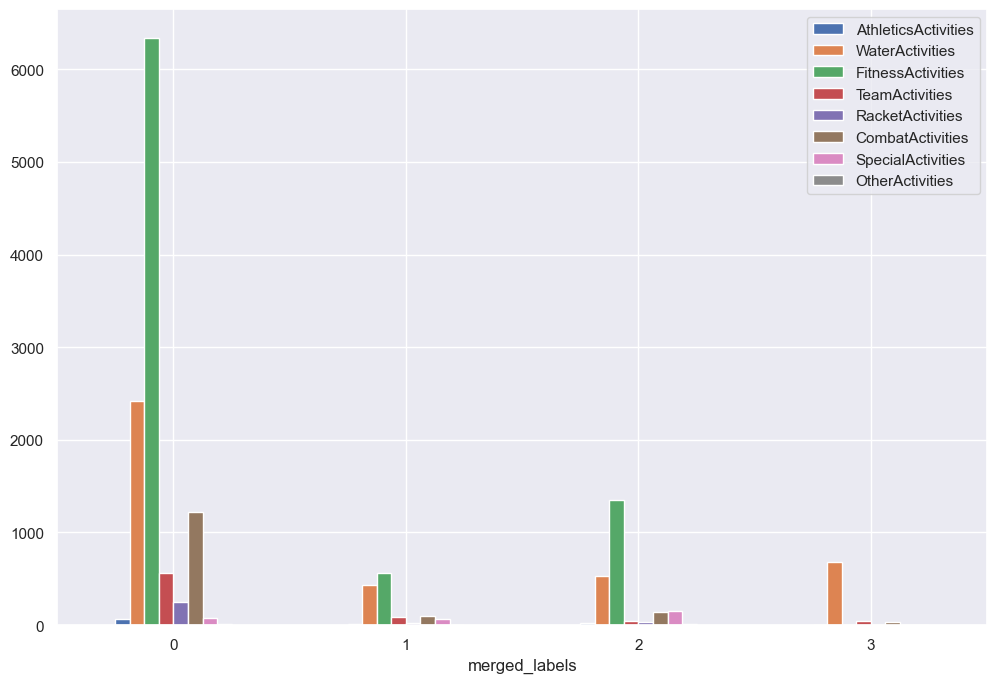

In [103]:
fig, ax = plt.subplots(figsize=(12,8))
df_activ.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

In [104]:
df_activ_pct = df_activ.apply(lambda col: col/df_activ.sum(axis=1))
df_activ_pct

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,0.005759,0.221298,0.578885,0.050914,0.022852,0.111974,0.006947,0.001371
1,0.004662,0.337995,0.439782,0.069930,0.020979,0.072261,0.054390,0.000000
2,0.010984,0.231107,0.591388,0.017135,0.016257,0.062390,0.065466,0.005272
3,0.003891,0.883268,0.000000,0.058366,0.003891,0.049287,0.001297,0.000000


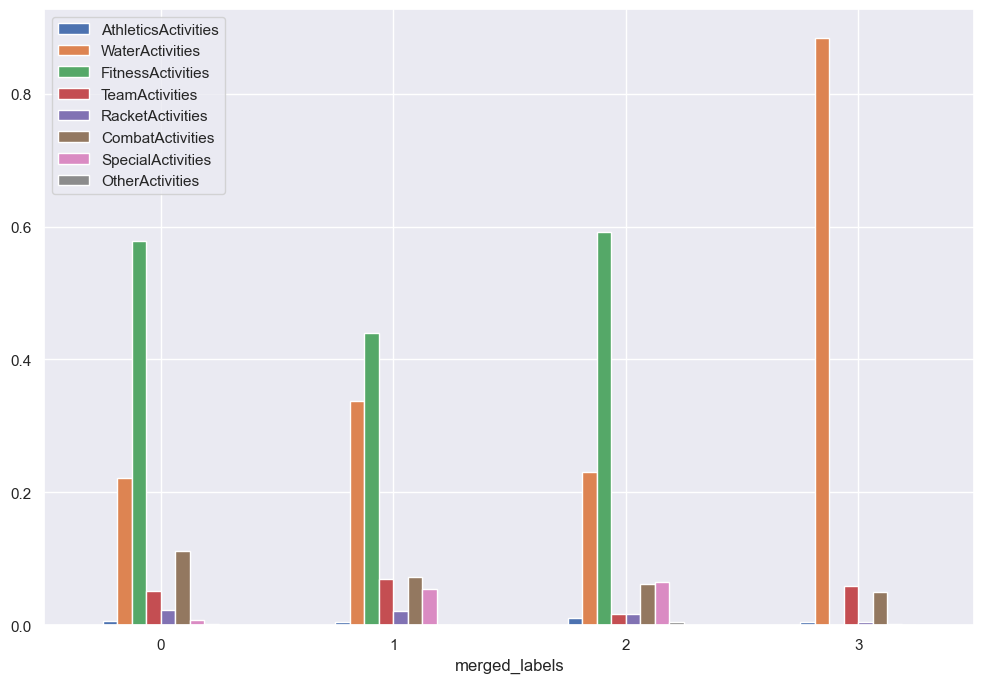

In [105]:
fig, ax = plt.subplots(figsize=(12,8))
df_activ_pct.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

#### Assess feature importance and reclassify outliers

**Using the R²**

In [106]:
def get_ss_variables(df):
    """Get the SS for each variable"""
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable"""
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [107]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df_[metric_features + ['merged_labels']], 'merged_labels').drop('merged_labels')

Age                     0.571786
Income                  0.583547
DaysWithoutFrequency    0.019033
LifetimeValue           0.657597
NumberOfFrequencies     0.519776
AttendedClasses         0.474961
DaysEnrolled            0.446872
NumberOfActivities      0.013152
Regularity              0.023655
CostPerDayEnrolled      0.022060
dtype: float64

**Using a Decision Tree**

In [108]:
# Preparing the data
X = df_.drop(columns=['demographic_labels','behavior_labels','merged_labels'])
y = df_.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly.".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 93.69% of the customers correctly.


In [109]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age                     0.091558
Gender                  0.000000
Income                  0.576259
DaysWithoutFrequency    0.000000
LifetimeValue           0.327580
AthleticsActivities     0.000000
WaterActivities         0.000000
FitnessActivities       0.000000
TeamActivities          0.000000
RacketActivities        0.000000
CombatActivities        0.000000
SpecialActivities       0.000000
OtherActivities         0.000000
NumberOfFrequencies     0.004603
AttendedClasses         0.000000
HasReferences           0.000000
Dropout                 0.000000
DaysEnrolled            0.000000
NumberOfActivities      0.000000
Regularity              0.000000
CostPerDayEnrolled      0.000000
dtype: float64

In [110]:
# Predicting the cluster labels of the outliers
df_out['merged_labels'] = dt.predict(df_out)
df_out.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,HasReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity,CostPerDayEnrolled,merged_labels
ID,,,,,,,,,,,,,,,,,,,,,
10016,1.511276,1,1.512118,-0.359091,1.587537,0.0,0.0,1.0,0.0,0.0,...,0.0,4.909398,-0.369454,0.0,1,3.449924,2.804228,0.645794,-0.801686,1
10036,-0.919346,0,-1.463063,-0.598742,5.681843,0.0,1.0,0.0,1.0,0.0,...,0.0,3.067760,5.997765,1.0,0,3.464361,5.894619,0.060323,0.686035,3
10060,1.868721,0,0.498304,-0.672481,5.025762,0.0,0.0,1.0,0.0,0.0,...,0.0,6.314358,-0.369454,0.0,0,3.202096,-0.286163,1.220371,0.581128,1
10069,0.867876,1,1.710905,0.000387,1.762990,0.0,0.0,1.0,1.0,0.0,...,0.0,-0.368697,0.282610,0.0,1,2.145818,5.894619,-0.976334,-0.339106,1
10075,-0.275946,0,0.213375,-0.414395,2.983158,0.0,1.0,0.0,0.0,0.0,...,0.0,7.111768,-0.369454,0.0,1,1.529856,-0.286163,3.217005,0.776081,1


run [WindowsPath('dot'), '-Kdot', '-Tsvg']


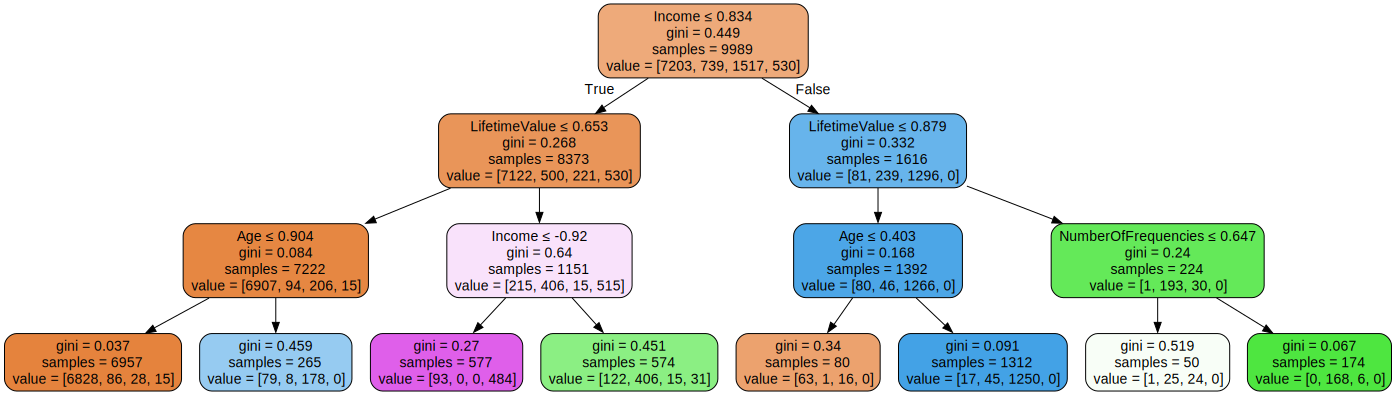

In [111]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
g = graphviz.Source(dot_data)
g